# **TOXICITY CLASSIFICATION**

![image.png](attachment:e2f43a53-2577-45c5-9b61-10ec16b22546.png)

# Importing Libraries and Reading Data

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import gensim
import string
import tensorflow as tf
import keras
from gensim.models import Word2Vec
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Embedding
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english')) - {"not"}
ps = PorterStemmer()
wn=nltk.WordNetLemmatizer()
import warnings
from keras import backend as K
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_df =pd.read_csv( "/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification/train.csv")

# EDA

In [ ]:
train_df.shape

(1804874, 45)

In [ ]:
train_df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [ ]:
train_df.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1804874.0,3.738434e+06,2.445187e+06,59848.0,796975.25,5223774.5,5.769854e+06,6334010.00
target,1804874.0,1.030173e-01,1.970757e-01,0.0,0.00,0.0,1.666667e-01,1.00
severe_toxicity,1804874.0,4.582099e-03,2.286128e-02,0.0,0.00,0.0,0.000000e+00,1.00
obscene,1804874.0,1.387721e-02,6.460419e-02,0.0,0.00,0.0,0.000000e+00,1.00
identity_attack,1804874.0,2.263571e-02,7.873156e-02,0.0,0.00,0.0,0.000000e+00,1.00
insult,1804874.0,8.115273e-02,1.760657e-01,0.0,0.00,0.0,9.090909e-02,1.00
threat,1804874.0,9.311271e-03,4.942218e-02,0.0,0.00,0.0,0.000000e+00,1.00
asian,405130.0,1.196355e-02,8.716616e-02,0.0,0.00,0.0,0.000000e+00,1.00
atheist,405130.0,3.205019e-03,5.019273e-02,0.0,0.00,0.0,0.000000e+00,1.00
bisexual,405130.0,1.884285e-03,2.607737e-02,0.0,0.00,0.0,0.000000e+00,1.00


In [ ]:
train_df.isnull().sum()

id                                           0
target                                       0
comment_text                                 3
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

In [ ]:
train_df.isnull().sum()*100/len(train_df)

id                                      0.000000
target                                  0.000000
comment_text                            0.000166
severe_toxicity                         0.000000
obscene                                 0.000000
identity_attack                         0.000000
insult                                  0.000000
threat                                  0.000000
asian                                  77.553558
atheist                                77.553558
bisexual                               77.553558
black                                  77.553558
buddhist                               77.553558
christian                              77.553558
female                                 77.553558
heterosexual                           77.553558
hindu                                  77.553558
homosexual_gay_or_lesbian              77.553558
intellectual_or_learning_disability    77.553558
jewish                                 77.553558
latino              

In [ ]:
train_df['target'].value_counts()

target
0.000000    1264764
0.166667     138501
0.200000     107492
0.300000      59098
0.400000      50013
             ...   
0.956873          1
0.976675          1
0.932621          1
0.918302          1
0.877495          1
Name: count, Length: 2913, dtype: int64

In [ ]:
train_df['target'].nunique()

2913

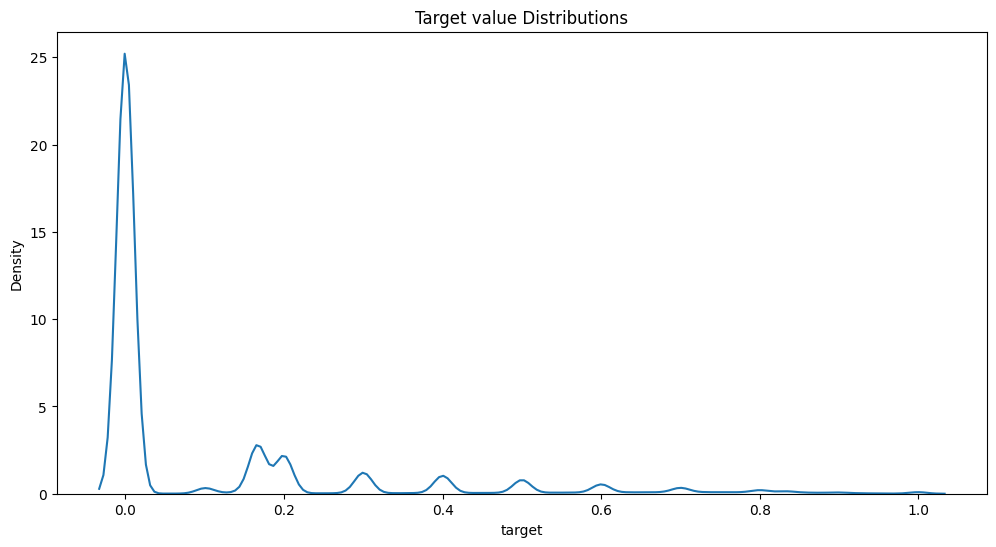

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Target value Distributions")
sns.distplot(train_df['target'], kde=True, hist= False,bins=240, label='target')
plt.show()

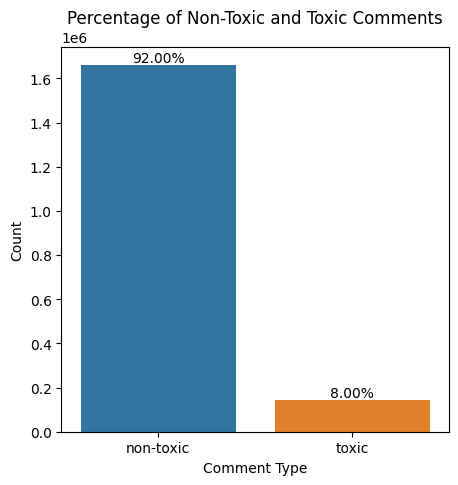

In [ ]:
temp = train_df['target'].apply(lambda x: "non-toxic" if x < 0.5 else "toxic")
fig, ax = plt.subplots(figsize=(5, 5))
total = len(temp)
cntplot = sns.countplot(x=temp, ax=ax)
cntplot.set_title('Percentage of Non-Toxic and Toxic Comments')
for p in cntplot.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha='center', va='bottom')

plt.ylabel('Count')
plt.xlabel('Comment Type')
plt.show()

> So dataset is imbalanced as 92% of the comments are non-toxic and only 8% are toxic

> The data also has several additional toxicity subtype attributes
- severe_toxicity
- obscene
- threat
- insult
- identity_attack
- sexual_explicit

In [ ]:
features = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit']

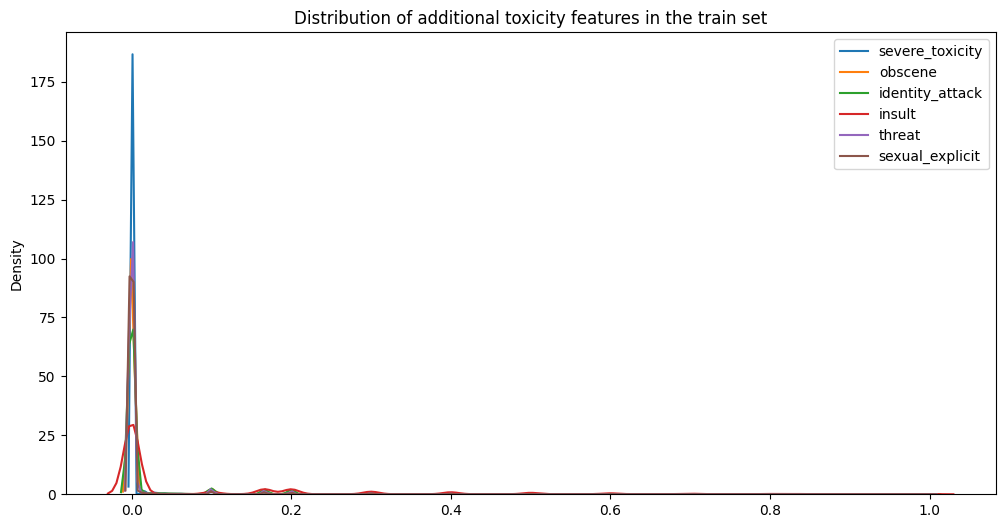

In [ ]:
def plot_features_distribution(features, title, data):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        sns.distplot(data[feature],kde=True,hist=False, bins=240, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()
plot_features_distribution(features, "Distribution of additional toxicity features in the train set", train_df)

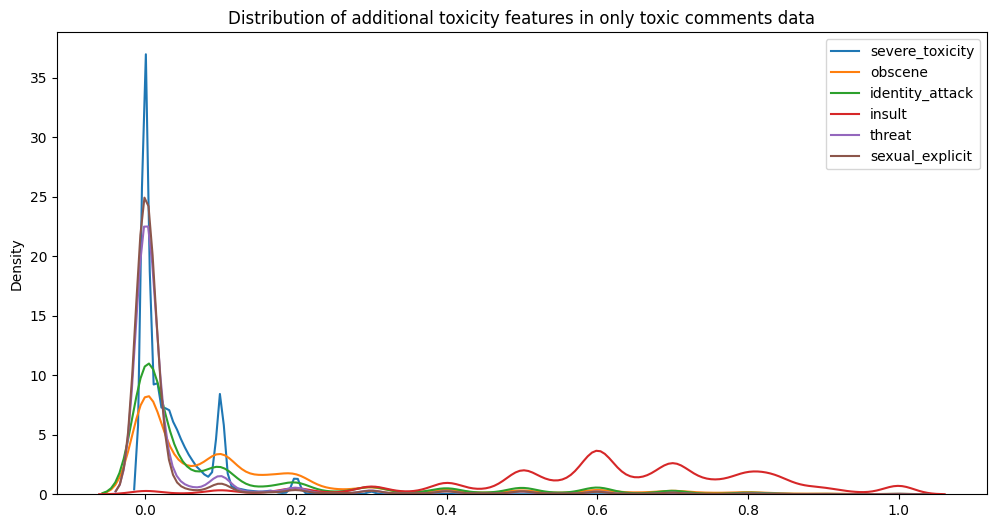

In [ ]:
temp = train_df[train_df['target'] > 0.5]
plot_features_distribution(features, "Distribution of additional toxicity features in only toxic comments data", temp)

In [ ]:
def count_toxicity(data, features):
    toxicity_counts = {}
    for feature in features:
        counts = data[feature].apply(lambda x: 'toxic' if x > 0.5 else 'non-toxic').value_counts()
        sorted_counts = counts.sort_values(ascending=False)
        toxicity_counts[feature] = sorted_counts
    toxicity_df = pd.DataFrame(toxicity_counts)
    toxicity_df = toxicity_df.astype(int)
    return toxicity_df
toxicity_counts_df = count_toxicity(train_df, features)

print(toxicity_counts_df)

           severe_toxicity  obscene  identity_attack   insult   threat  \
non-toxic          1804866  1797226          1797241  1724987  1802081   
toxic                    8     7648             7633    79887     2793   

           sexual_explicit  
non-toxic          1801755  
toxic                 3119  


In [ ]:
def get_comment_nature(row):
    row = [row['severe_toxicity'], row['obscene'], row['identity_attack'], row['insult'], row['threat'], row['sexual_explicit']]
    maxarg = np.argmax(np.array(row))

    if maxarg == 0: return 'severe_toxicity'
    elif maxarg == 1: return 'obscene'
    elif maxarg == 2: return 'identity_attack'
    elif maxarg == 3: return 'insult'
    elif maxarg == 4: return 'threat'
    else: return 'sexual_explicit'

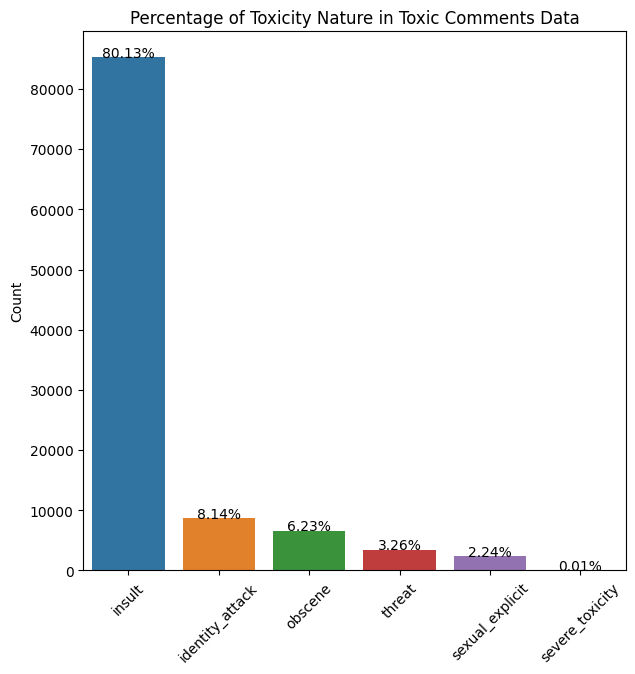

In [ ]:
x = temp.apply(get_comment_nature, axis=1)
count_data = x.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
total = float(len(x))
cntplot = sns.barplot(x=count_data.index, y=count_data.values, ax=ax)
cntplot.set_title('Percentage of Toxicity Nature in Toxic Comments Data')
cntplot.set_ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100 * height / total), ha='center')

plt.xticks(rotation=45)
plt.show()

# Machine Learning Models

In [ ]:
df= train_df[['comment_text', 'target']]

In [ ]:
df= df.dropna()
df.isnull().sum()*100/len(df)

comment_text    0.0
target          0.0
dtype: float64

## Data Resampling

In [ ]:
from sklearn.utils import resample

df_majority = df[df['target'] < 0.5]
df_minority = df[df['target'] >= 0.5]

df_majority_undersampled = resample(df_majority,
                                     replace=False,
                                     n_samples=160000,
                                     random_state=42)

df_balanced = pd.concat([df_majority_undersampled, df_minority])

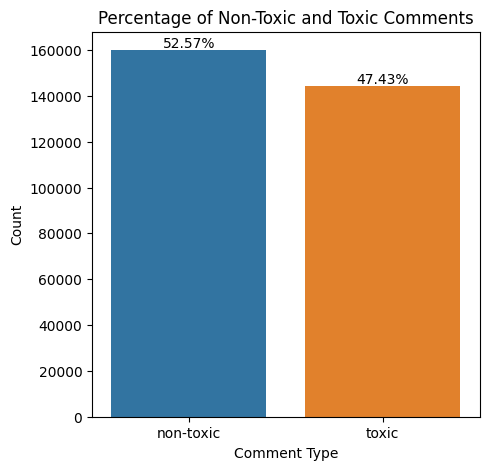

In [ ]:
temp = df_balanced['target'].apply(lambda x: "non-toxic" if x < 0.5 else "toxic")
fig, ax = plt.subplots(figsize=(5, 5))
total = len(temp)
cntplot = sns.countplot(x=temp, ax=ax)
cntplot.set_title('Percentage of Non-Toxic and Toxic Comments')
for p in cntplot.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha='center', va='bottom')

plt.ylabel('Count')
plt.xlabel('Comment Type')
plt.show()

In [ ]:
df_balanced.shape

(304334, 2)

## Text Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def preprocess(text_string):
    text_string = text_string.lower()
    text_string = re.sub(r'http\S+|www\S+', '', text_string)
    text_string = re.sub(r'[^A-Za-z\s]', ' ', text_string)
    words = word_tokenize(text_string)
    cleaned_text = []
    for word in words:
        if word not in stop_words:
            cleaned_text.append(stemmer.stem(word))
    return ' '.join(cleaned_text)

df_balanced['preprocessed_text'] = df_balanced['comment_text'].apply(preprocess)

## Vectorization

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_balanced['preprocessed_text'])

In [ ]:
y = df_balanced['target'].values

## Data Splitting

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
print("x_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape",X_test.shape)
print("y_test shape",y_test.shape)
print("X_val shape", X_val.shape)
print("y_val shape", y_val.shape)

x_train shape (182600, 5000)
y_train shape (182600,)
x_test shape (60867, 5000)
y_test shape (60867,)
X_val shape (60867, 5000)
y_val shape (60867,)


## Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train , y_train)
y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)

In [ ]:
# Validation
val_mae = mean_absolute_error(y_val, y_val_pred)
print(f'Validation Mae: {val_mae:.4f}')

val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation MSE: {val_mse:.4f}')

val_rmse = np.sqrt(val_mse)
print(f'Validation RMSE: {val_rmse:.4f}')

val_r2 = r2_score(y_val, y_val_pred)
print(f'Validation R2 : {val_r2:.4f}')


# Test
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mae: {test_mae:.4f}')

test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse:.4f}')

test_rmse = np.sqrt(test_mse)
print(f'Test RMSE: {test_rmse:.4f}')

test_r2 = r2_score(y_test, y_test_pred)
print(f'Test R2: {test_r2:.4f}')


Validation Mae: 0.1694
Validation MSE: 0.0459
Validation RMSE: 0.2142
Validation R2 : 0.5652
Test Mae: 0.1688
Test MSE: 0.0456
Test RMSE: 0.2136
Test R2: 0.5687


In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

results_df.head(20)

,Actual,Predicted
0,0.600000,0.941835
1,0.800000,0.537994
2,0.500000,0.374336
3,0.000000,0.623343
4,0.700000,0.463979
5,1.000000,0.382410
6,0.500000,0.535274
7,0.400000,0.464072
8,0.500000,0.198128
9,1.000000,0.224973


## Gradient Boosting Regression

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_train_pred = gbr.predict(X_train)
y_val_pred = gbr.predict(X_val)
y_test_pred = gbr.predict(X_test)

In [ ]:
# Train
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Validation
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

 # Test
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse:.4f}')
print(f'Validation MSE: {val_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')
print(f'test Mae: {test_mae:.4f}')
print(f'Validation Mae: {val_mae:.4f}')
print(f'Test r2: {test_r2:.4f}')
print(f'val r2 : {val_r2:.4f}')

Training MSE: 0.0675
Validation MSE: 0.0674
Test MSE: 0.0675
test Mae: 0.2310
Validation Mae: 0.2307
Test r2: 0.3618
val r2 : 0.3611


In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

results_df

,Actual,Predicted
0,0.6,0.544927
1,0.8,0.432485
2,0.5,0.318071
3,0.0,0.293517
4,0.7,0.250885
...,...,...
60862,0.0,0.298863
60863,0.0,0.250885
60864,0.6,0.250885
60865,0.6,0.376377


## XGB Regression

In [ ]:
xgb= XGBRegressor(n_estimators=50,
    learning_rate=0.3,
    max_depth=10,
    subsample=0.4,
    colsample_bytree=0.4,
    random_state=42)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred= xgb.predict(X_test)

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred.flatten()
})
results_df.head(20)

,Actual,Predicted
0,0.600000,0.780182
1,0.800000,0.544274
2,0.500000,0.284694
3,0.000000,0.510565
4,0.700000,0.180939
5,1.000000,0.718322
6,0.500000,0.524159
7,0.400000,0.470288
8,0.500000,0.171799
9,1.000000,0.162376


In [ ]:
y_train_pred = xgb.predict(X_train)
y_val_pred = xgb.predict(X_val)
y_test_pred = xgb.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse= mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2= r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse}, Train R²: {train_r2}')
print(f'Val MSE: {val_mse}, Val R²: {val_r2}')
print(f'Test MSE: {test_mse}, Test R²: {test_r2}')

Train MSE: 0.04446949569615578, Train R²: 0.5787781408005734
Val MSE: 0.04785345372633879, Val R²: 0.5466556075280906
Test MSE: 0.04787396369619528, Test R²: 0.5474705022315027


# Deep Learning Models

In [ ]:
df_sample= df.head(400000)

## Text Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def preprocess(text_string):
    text_string = text_string.lower()
    text_string = re.sub(r'http\S+|www\S+', '', text_string)
    text_string = re.sub(r'[^A-Za-z\s]', ' ', text_string)
    words = word_tokenize(text_string)
    cleaned_text = []
    for word in words:
        if word not in stop_words:
            cleaned_text.append(stemmer.stem(word))
    return ' '.join(cleaned_text)

df_sample['preprocessed_text'] = df_sample['comment_text'].apply(preprocess)

In [ ]:
df_sample['target_binary'] = df_sample['target'].apply(lambda x: 1 if x >= 0.5 else 0)
y= df_sample['target_binary']

## Padding

In [ ]:
tokenized_sentences = [text.split() for text in df_sample['preprocessed_text']]

all_tokens = [token for tokens in tokenized_sentences for token in tokens]
unique_tokens = set(all_tokens)
word_index = {word: i + 1 for i, word in enumerate(unique_tokens)}

In [ ]:
from keras.preprocessing.sequence import pad_sequences
tokenized_sequences = [[word_index[token] for token in tokens] for tokens in tokenized_sentences]

max_length = 1000
padded_sequences = pad_sequences(tokenized_sequences, maxlen=max_length)

## Data Resampling using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(padded_sequences, y)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Testing shape:", X_test.shape)

Training shape: (589387, 1000)
Validation shape: (73673, 1000)
Testing shape: (73674, 1000)


## LSTM Model

In [ ]:
from tensorflow.keras import regularizers
from keras.layers import Dense, LSTM, Dropout, Embedding, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, input_length=max_length))
model.add(LSTM(16, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/5
9210/9210 ━━━━━━━━━━━━━━━━━━━━ 346s 37ms/step - accuracy: 0.9404 - loss: 0.1846 - val_accuracy: 0.9609 - val_loss: 0.1070
Epoch 2/5
9210/9210 ━━━━━━━━━━━━━━━━━━━━ 342s 37ms/step - accuracy: 0.9646 - loss: 0.1033 - val_accuracy: 0.9609 - val_loss: 0.1085
Epoch 3/5
9210/9210 ━━━━━━━━━━━━━━━━━━━━ 345s 37ms/step - accuracy: 0.9685 - loss: 0.0901 - val_accuracy: 0.9597 - val_loss: 0.1071
Epoch 4/5
9210/9210 ━━━━━━━━━━━━━━━━━━━━ 341s 37ms/step - accuracy: 0.9707 - loss: 0.0844 - val_accuracy: 0.9602 - val_loss: 0.1090


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_binary.flatten() # Flatten in case y_pred is a 2D array
})
results_df.head(10)

2303/2303 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step


,Actual,Predicted
148152,0,0
480974,1,1
274099,0,0
583484,1,1
531552,1,1
480090,1,1
696883,1,1
237746,0,0
409501,1,1
21802,0,0


In [ ]:
report = classification_report(y_test, y_pred_binary)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     36818
           1       0.98      0.94      0.96     36856

    accuracy                           0.96     73674
   macro avg       0.96      0.96      0.96     73674
weighted avg       0.96      0.96      0.96     73674



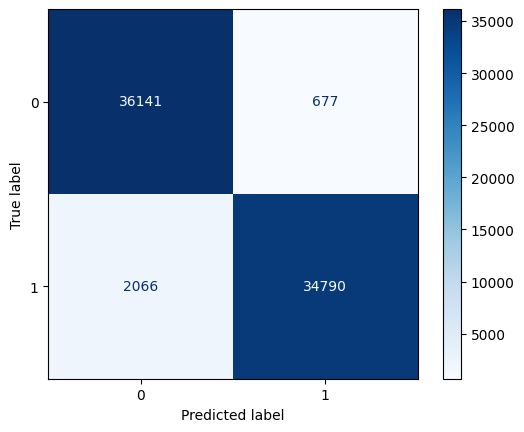

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')